In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
my_train=pd.read_excel(r"C:\Users\LAKSHMI NARAYANA\Dropbox\My PC (LAPTOP-BI77ERKM)\Desktop\proj 1\Data_Train.xlsx")

In [4]:
my_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [5]:
my_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
my_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
my_train.shape

(10683, 11)

In [8]:
my_train[my_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
my_train.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
my_train.dropna(inplace=True)

In [11]:
my_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data=my_train.copy()

In [13]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
def change_into_datatime(col):
    data[col]=pd.to_datetime(data[col])

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datatime(feature)

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [20]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [21]:
data['Journey_date']=data['Date_of_Journey'].dt.day

In [22]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [23]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-28 05:50:00,2022-07-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [25]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [26]:
def Hour_Minute(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [27]:
Hour_Minute(data,'Arrival_Time')

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-28 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-28 05:50:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15


In [28]:
Hour_Minute(data,'Dep_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


In [29]:
def Time_extract(f):
    if(f>4) and (f<=8):
        return 'Early_Mng'
    elif(f>8) and (f<=12):
        return 'Morning'
    elif(f>12) and (f<=16):
        return 'Afternoon'
    elif(f>16) and (f<=20):
        return ' Evening'
    elif(f>20) and (f<=20):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

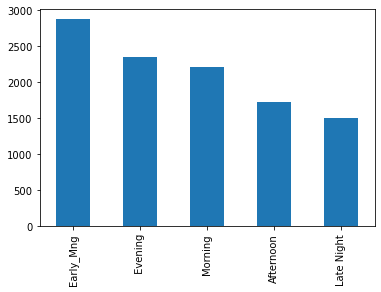

In [30]:
data['Dep_Time_hour'].apply(Time_extract).value_counts().plot(kind='bar')

In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [34]:
cf.go_offline()

In [35]:
data['Dep_Time_hour'].apply(Time_extract).value_counts().iplot(kind='bar')

In [36]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25


In [37]:
#Duratipn has to be processed into hours and minutes for Ml Models and hours like
#6 hr conerts to 6 hr 00 mins so cleaning required
# use simple if in such cases

In [38]:
def Split_duration(d):
    if 'h' not in d:
        d='0h '+d
    elif 'm' not in d:
        d=d+' 0m'
    return(d)
        

In [39]:
data['Duration']=data['Duration'].apply(Split_duration)

In [40]:
#converting minutes into hours sometimes only minutes travel are very low and some 
#are 2 days so this becames a outliers so we convert minutes to hrs

In [41]:
data['Duration'][0].split(' '[0]) #splitting based on space between hr and min

['2h', '50m']

In [42]:
int(data['Duration'][0].split(' ')[0][0:-1]) #getting data from zero index to last

2

In [43]:
int(data['Duration'][0].split(' ')[1][0:-1]) #calling int function makes ur number as ontegers

50

In [44]:
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [45]:
data['Duration_hrs']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [46]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [47]:
#Duration is processes now study its impact on Price?????

In [56]:
data['Total_Duration']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [57]:
#now Duration is also in numeral so we can plot price vs Duration

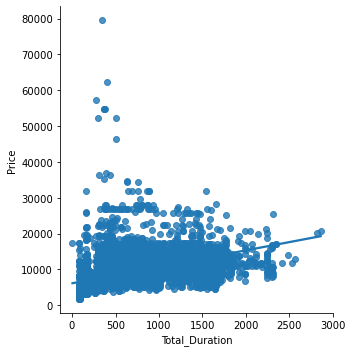

In [59]:
sns.lmplot(x='Total_Duration',y='Price',data=data)

In [ ]:
#as duration increases price also increases
#which city has maximum final destinations

<AxesSubplot:ylabel='Destination'>

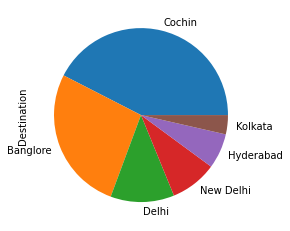

In [63]:
data['Destination'].unique()
data['Destination'].value_counts().plot(kind='pie')

In [ ]:
#kind=pie or bar we can visualize
#cochin and banglore has more flights
#find delhi or new delhi area same
#find the routes of journey of jetairaways
#group by routes and counts
 ###Airline vs price analysis

In [68]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

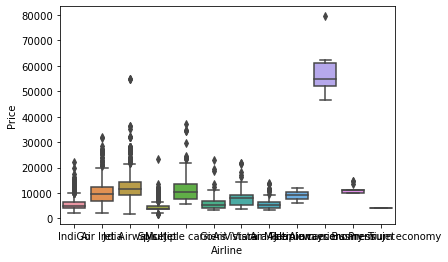

In [69]:
plt.figure(figsixe)
sns.boxplot(x='Airline',y='Price',data=data)
